# Extrema of functions

We can find the extrema (minima and maxima) of functions using scipy.

In this case, we use its signal procesing routines in scipy.signal.

## Example:

Find the maxima and minima of the function given by the following data:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/cooltable.dat

"cooltable.dat", which has two columns:

1. Temperatures of the gas in units of: $\rm K$.

2. Cooling rates in units of: $\rm erg\,cm^3\,s^{-1}$.


We want to identify the minima and maxima of the cooling function.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import scipy.signal as ss

### Read table:

In [2]:
df = pd.read_csv("./cooltable.dat", sep = '\s+', header = None)

In [3]:
print(df)

                 0             1
0     1.000000e+01  8.739400e-28
1     1.020900e+01  9.095800e-28
2     1.042300e+01  9.470500e-28
3     1.064100e+01  9.889700e-28
4     1.086400e+01  1.033600e-27
...            ...           ...
996   9.148900e+09  6.870700e-22
997   9.340400e+09  7.074400e-22
998   9.535900e+09  7.285800e-22
999   9.735500e+09  7.505300e-22
1000  9.735500e+09  7.505300e-22

[1001 rows x 2 columns]


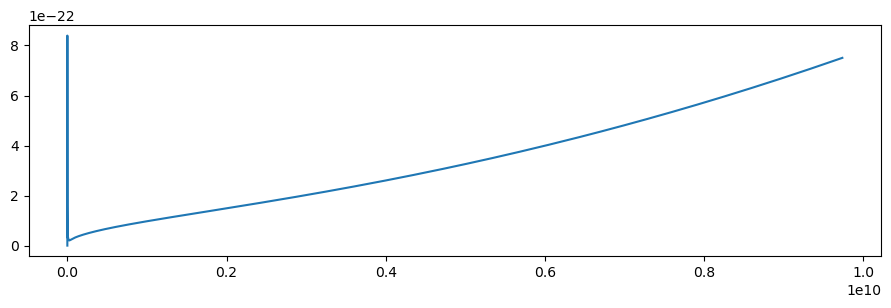

In [5]:
# Linear scale plot

plt.figure(figsize=(11,3))

plt.plot(df[0], df[1])

plt.show()

In [6]:
temperatures = np.log10(np.array(df[0]))

coolingrates = np.log10(np.array(df[1]))
#print(type(temperatures))

In [6]:
print(coolingrates)

[-27.05851838 -27.0411591  -27.02362709 ... -21.13752275 -21.12463194
 -21.12463194]


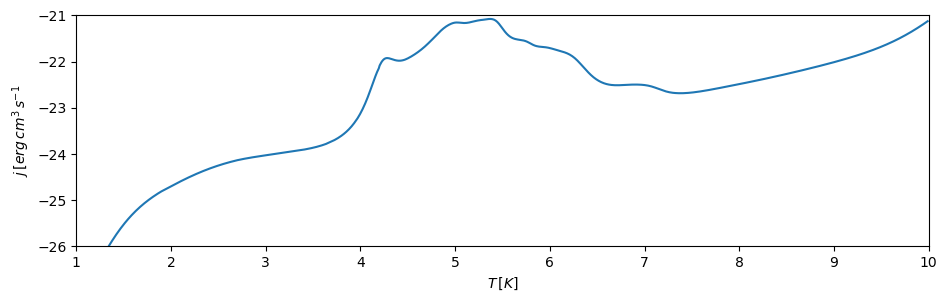

In [10]:
fig, ax = plt.subplots(figsize=(11, 3))

plt.plot(temperatures, coolingrates)

plt.xlabel(r"$T\,[K]$")

plt.ylabel(r"$j\,[erg\,cm^3\,s^{-1}$")

plt.xlim(1,10)
plt.ylim(-26, -21)

plt.show()

## Peak finding:

We can use find_peaks().

In [11]:
peaks, _ = ss.find_peaks(coolingrates)

In [12]:
print(peaks)

[365 446 486 656]


In [13]:
# Actual extrema
t_ext = temperatures[peaks]
print(t_ext)

c_ext = coolingrates[peaks]
print(c_ext)


[4.28402445 5.01283722 5.37270953 6.90226404]
[-21.92274114 -21.15271738 -21.07601551 -22.49616848]


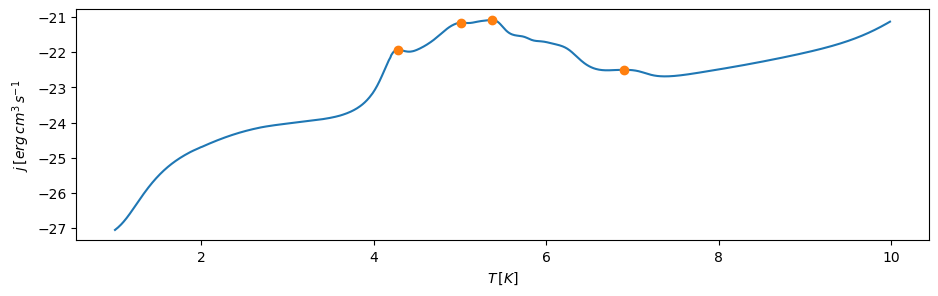

In [14]:
fig, ax = plt.subplots(figsize=(11, 3))

plt.plot(temperatures, coolingrates)
plt.plot(temperatures[peaks], coolingrates[peaks], "o")

plt.xlabel(r"$T\,[K]$")

plt.ylabel(r"$j\,[erg\,cm^3\,s^{-1}$")

#plt.xlim(4,10)
#plt.ylim(-24, -21)

plt.show()

In [15]:
print(temperatures[peaks], coolingrates[peaks])

[4.28402445 5.01283722 5.37270953 6.90226404] [-21.92274114 -21.15271738 -21.07601551 -22.49616848]


## Extrema finding:

In [16]:
maxima = ss.argrelextrema(coolingrates, np.greater)

minima = ss.argrelextrema(coolingrates, np.less)

In [17]:
print(maxima)

(array([365, 446, 486, 656]),)


In [18]:
print(minima)

(array([379, 455, 709]),)


In [19]:
extrema = np.concatenate([maxima, minima], axis=None)

print(extrema)

[365 446 486 656 379 455 709]


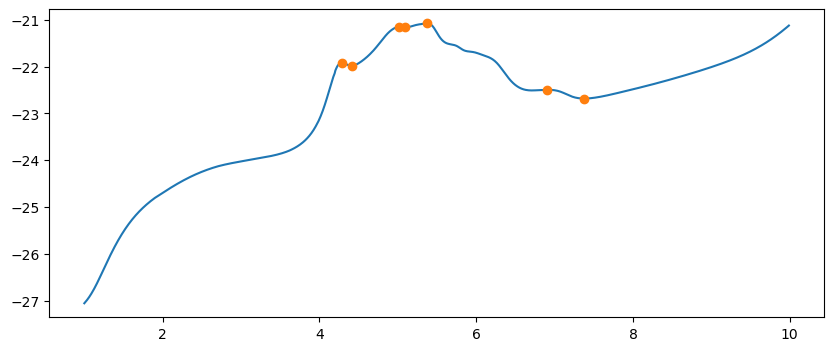

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))


plt.plot(temperatures, coolingrates)
plt.plot(temperatures[extrema], coolingrates[extrema], "o")

plt.show()

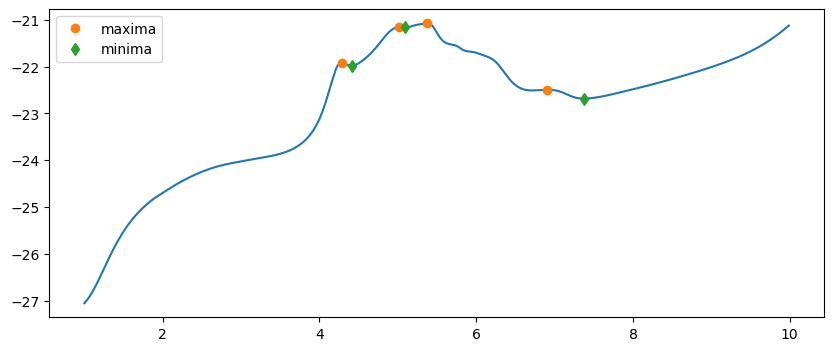

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(temperatures, coolingrates)
plt.plot(temperatures[maxima], coolingrates[maxima], "o", label = 'maxima')
plt.plot(temperatures[minima], coolingrates[minima], "d", label = 'minima')
plt.legend()
plt.show()

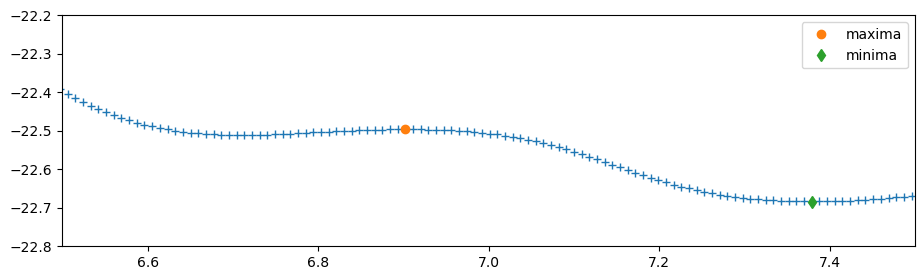

In [22]:
fig, ax = plt.subplots(figsize=(11, 3))

plt.plot(temperatures, coolingrates, linestyle = " ", marker = '+')
plt.plot(temperatures[maxima], coolingrates[maxima], "o", label = 'maxima')
plt.plot(temperatures[minima], coolingrates[minima], "d", label = 'minima')

plt.xlim(6.5,7.5)
plt.ylim(-22.8,-22.2)
plt.legend()
plt.show()

## Extrema finding with a different comparator:

In [23]:
maxima2 = ss.argrelextrema(coolingrates, np.greater_equal, mode = 'wrap')

minima2 = ss.argrelextrema(coolingrates, np.less_equal, mode = 'wrap')

In [24]:
extrema2 = np.concatenate([maxima2, minima2], axis=None)

print(extrema2)

[ 365  446  486  656  999 1000    0  379  455  634  635  709]


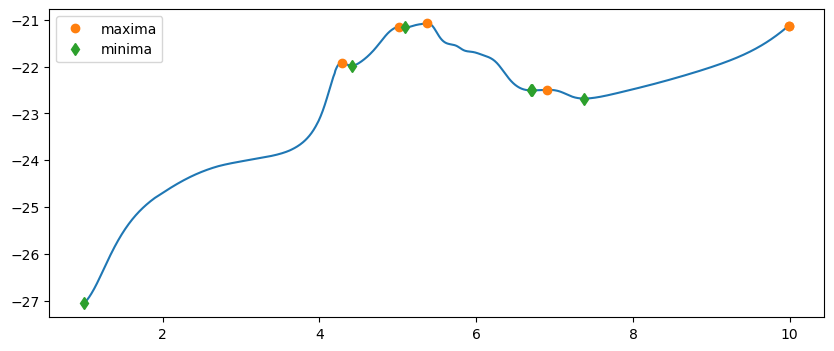

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(temperatures, coolingrates)
plt.plot(temperatures[maxima2], coolingrates[maxima2], "o", label = 'maxima')
plt.plot(temperatures[minima2], coolingrates[minima2], "d", label = 'minima')
plt.legend()
plt.show()

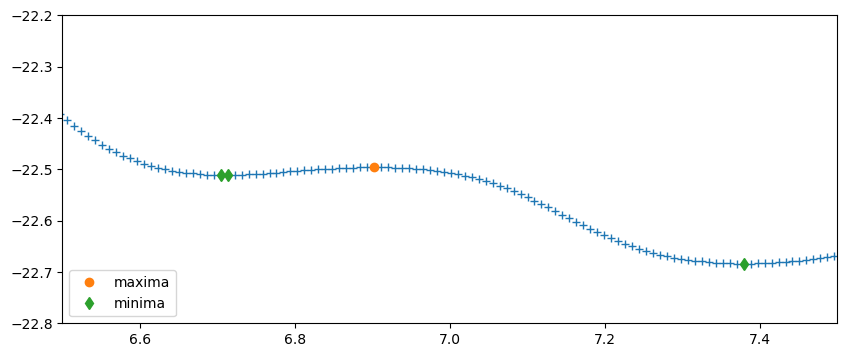

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(temperatures, coolingrates, linestyle = " ", marker = '+')
plt.plot(temperatures[maxima2], coolingrates[maxima2], "o", label = 'maxima')
plt.plot(temperatures[minima2], coolingrates[minima2], "d", label = 'minima')

plt.xlim(6.5,7.5)
plt.ylim(-22.8,-22.2)
plt.legend()
plt.show()